In [65]:
import numpy as np
from regression import genetic_algorithm_final

ImportError: cannot import name 'genetic_algorithm_final' from 'regression' (c:\Users\name\Desktop\AI-CW2\regression.py)

In [5]:
# loading all the points from the data files into arrays

tset_file = open("data/training_set_v2", "r")
tlabel_file = open("data/training_labels_v2", "r")
vset_file = open("data/validation_set_v2", "r")
vlabel_file = open("data/validation_labels_v2", "r")

tset = []       #training Set
tlabel = []     #training labels
vset = []       #valudation Set
vlabel = []     #validation labels

for i in tset_file.readlines():
    x0,x1,x2 = i.split(sep=',')
    tset += [[float(x0),float(x1),float(x2)]]

tset_file.close()


for i in tlabel_file.readlines():
    di = i.split()
    tlabel += [float(di[0])]

tlabel_file.close()

for i in vset_file.readlines():
    x0,x1,x2 = i.split(sep=',')
    vset += [[float(x0),float(x1),float(x2)]]

vset_file.close()


for i in vlabel_file.readlines():
    di = i.split()
    vlabel += [float(di[0])]

vlabel_file.close()




In [62]:
coefficients_on_tset = genetic_algorithm_final(tset)

NameError: name 'genetic_algorithm_final' is not defined

In [60]:
def my_fun(x,y):
    return (0.491*np.cbrt(x-5)) + -0.738*np.cbrt(y+5) + 0.698
    #return (0.486*np.cbrt(x-5)) + -0.756*np.cbrt(y+5) + 0.606
def GA_classfier(point):
    prediction = my_fun(point[0], point[1])
    if point[2] >= prediction:
        return 1
    if point[2] < prediction:
        return -1
def error(pred, val):
    misclassified = 0
    for i in range(len(pred)):
        if pred[i] != val[i]:
            misclassified += 1
    return misclassified/len(pred)

In [61]:
def test():
    classification_on_tdata = []
    classification_on_vdata = []
    
    for pt in tset:
        classification_on_tdata.append(GA_classfier(pt))
    
    for pt in vset:
        classification_on_vdata.append(GA_classfier(pt))
    print("classification error on training set: ", f"{error(classification_on_tdata,tlabel):.4}")
    
    print("classification error on validation set: ", f"{error(classification_on_vdata,vlabel):.4}", "\n")
        
    
def runTests():
    test()
    
runTests()

classification error on training set:  0.01667
classification error on validation set:  0.01852 



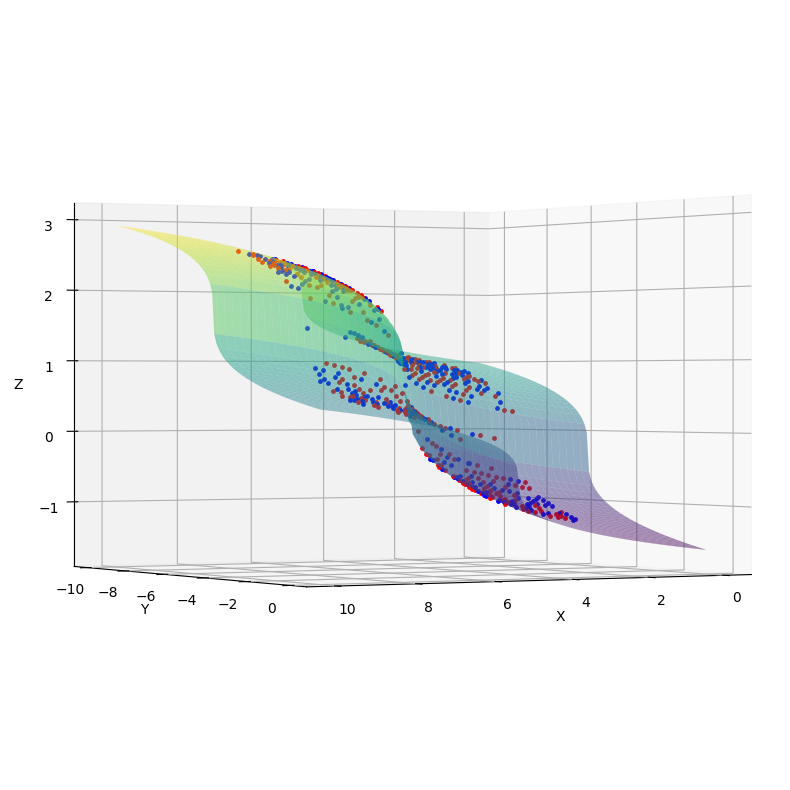

In [55]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function my_fun(x, y)

# Create a figure and a 3D axis

fig = plt.figure(figsize=(10, 10)) 
ax = fig.add_subplot(111, projection='3d')

# Plot points with different colors based on labels
for i, pt in enumerate(vset):
    ax.scatter(pt[0], pt[1], my_fun(pt[0], pt[1]),  c='blue' if vlabel[i] == 1 else 'red', label='Points',s= 6)

# Create data for the surface plot
x_surface = np.linspace(0, 10, 100)
y_surface = np.linspace(-10, 0, 100)
x_surface, y_surface = np.meshgrid(x_surface, y_surface)
z_surface = my_fun(x_surface, y_surface)

# Plot the surface of the function my_fun
ax.plot_surface(x_surface, y_surface, z_surface, cmap='viridis', alpha=0.5, label='Surface')

# Set labels and show the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
 
ax.view_init(0, 60) 
plt.show()
